<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab1_2/blob/master/lab4_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

## 간단한 matplotlib API

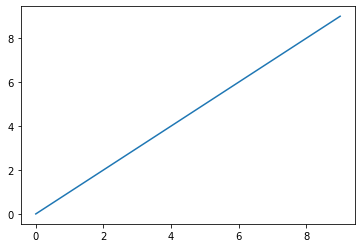

In [ ]:
plt.plot(np.arange(10))  # x-axis 는 by default 0,1,2,3,4...

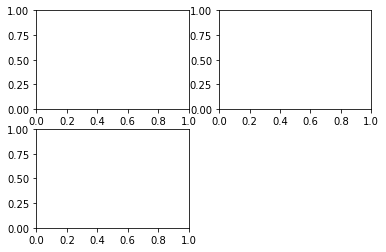

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)

### matplotlib plotting
- hist
- scatter
- plot

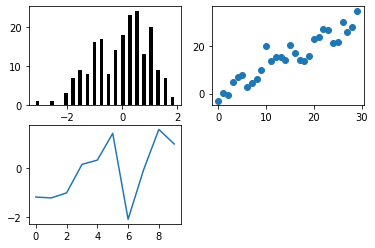

In [ ]:
ax1.hist(np.random.randn(200), bins=20, color='k', rwidth=0.5)     # 같은 코드를 여러번 실행하면 그림이 겹침
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
ax3.plot(np.arange(10),np.random.randn(10))
fig                 # create a new figure


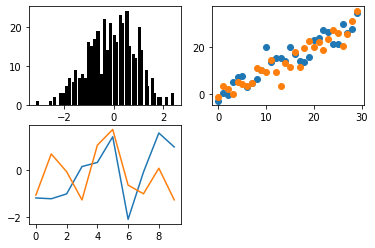

In [ ]:
ax1.hist(np.random.randn(200), bins=20, color='k', rwidth=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
ax3.plot(np.arange(10),np.random.randn(10))
fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e5029fbd0>,
      dtype=object)

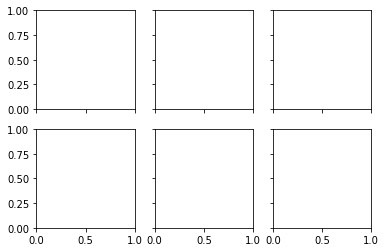

In [ ]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=True)
# axes = plt.subplots(2, 3) ## 2*3을 설정해주고 아래의 결과를 볼 수 있다.
axes

#### subplot 주변의 공간 고정

In [ ]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None) # subplot 간의 간격을 조정하는 함수 _adjust()
# wspace, hspace: width and height between the subplots
# left, right, top, bottom: sides of the subplots

<Figure size 432x288 with 0 Axes>

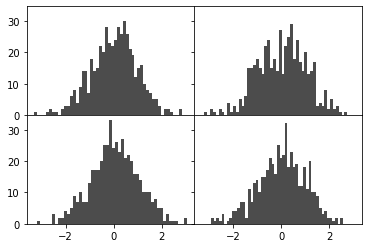

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.7)
plt.subplots_adjust(wspace=0, hspace=0)

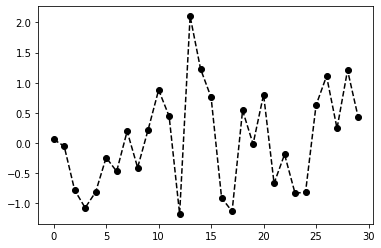

In [ ]:
plt.plot(randn(30), 'ko--')

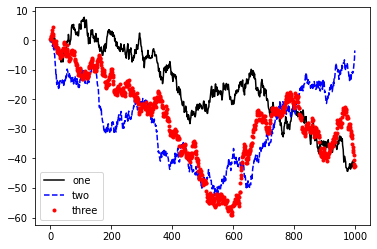

In [ ]:
# 1000 개의 랜덤 넘버 (정규분포)의 누적 값을 그리는 예 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')    # cumulative sum (negative value 가 들어 있)
ax.plot(randn(1000).cumsum(), 'b--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')

ax.legend(loc='best')     # overlap 이 가장 적은 곳을 자동으로 찾아 위치

In [ ]:
# for reference for cumsum() and sum()
arr = np.array([[1,2,3],[4,5,6]])
arr, arr.sum(), arr.cumsum()

(array([[1, 2, 3],
        [4, 5, 6]]), 21, array([ 1,  3,  6, 10, 15, 21]))

### subplot 주석달기 및 그리는 방법

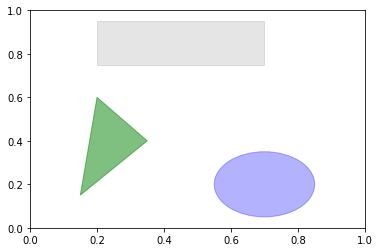

In [ ]:
# 일반 도형을 그리는 함수도 제공 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.5, 0.2, color='k', alpha=0.1) 
       ##(0.2,0.75) 사각형의 시작점 0.5 가로길이 0.2 세로길이를 뜻한다.
       ## alpha 색깔의 명도를 나타내준다 인수를 바꿔서 결과 변화를 확인해보자!
        
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
       ## (0,7,0,2) 원의 중심 을 뜻한다 / 0.15 원의 반지름을 뜻한다.
    
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], #꼭지점의 좌표
                   color='g', alpha=0.5)

ax.add_patch(rect) ## ax subplot에 도형을 추가한다.
ax.add_patch(circ)
ax.add_patch(pgon)

### Series 나 DataFrame 으로부터 막대그라프 그리는 예
- dataframe.plot(kind=' ')
- series.plot(kind=' ')

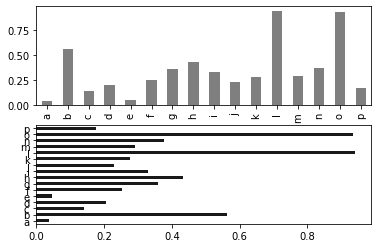

In [ ]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# data

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.5)  # alpha-transparency
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.9)

In [ ]:
df = DataFrame(np.random.rand(6, 4),
               index=['KIm', 'Choi', 'Park', 'Lee', 'Goo', 'Jeong'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
KIm,0.700678,0.515909,0.991748,0.577763
Choi,0.084950,0.495372,0.894280,0.949179
Park,0.090417,0.125451,0.838621,0.655087
Lee,0.182517,0.386537,0.574829,0.482013
Goo,0.843307,0.296195,0.983045,0.363954
Jeong,0.011529,0.406189,0.399719,0.628308


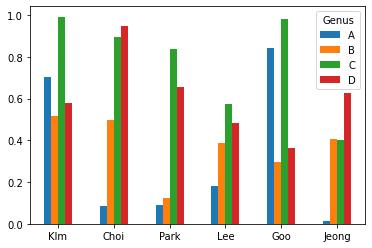

In [ ]:
df.plot(kind='bar', rot=0)

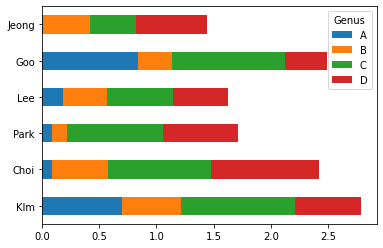

In [ ]:
df.plot(kind='barh', stacked=True)

### 히스토그램 및 밀도(density) 그래프

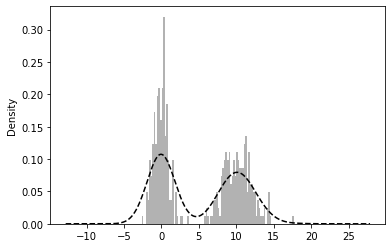

In [ ]:
np.random.seed(42)
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1), same as randn()
comp2 = np.random.normal(10, 2, size=200)  # N(10, 2), same as 10 + 2*randn()
values = Series(np.concatenate([comp1, comp2])) #concat(1,2) -1번째 문자열에 두번째 문자열을 합치는 함수와 동일
values.hist(bins=100, alpha=0.3, color='k', density=True)
values.plot(kind='kde', style='k--')
# kde (kernel density estimation - 히스토그램으로부터 확률밀도함수(PDF) 추정)